# 카메라 스티커앱 만들기 첫걸음 [프로젝트]

**학습 목표**

1. 얼굴 검출 및 랜드마크 검출
   1. dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아보자
2. 스티커 적용 위치 확인
   1. 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해보자
   2. 코 끝인 33번보다 좋은 위치가 있을 수 있다 - 찾아보기
3. 스티커 적용하기
   1. 오늘 배운 `np.where`를 사용해서 스티커 적용
   2. 스티커를 조금 더 자연스럽게 보이게 하려면? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 보자, opencv의 cv2.addWeighted() 참고
4. 문제점 찾아보기
   1. 셀프 카메라를 다양한 각도에서 촬영하여 스티커를 반복해서 적용해보기
   2. 문제점이 무엇인지 최대한 자세하게 기록해보기
      1. 얼굴 각도에 따라 스트커가 어떻게 변해야할까?
      2. 멀리서 촬영하면 왜 안될까? 옆으로 누워서 촬영하면 왜 안될까?
      3. 실행속도가 중요할까?
      4. 스티커앱을 만들 때 정확도가 얼마나 중요할까?

In [37]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

## 내 사진 Load -front

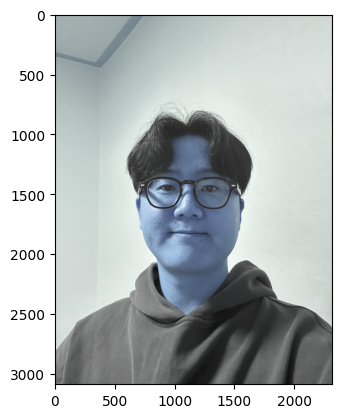

In [38]:
# 사진 load
my_selfie_path = '/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/ex_3_photo/front.png'
img_bgr = cv2.imread(my_selfie_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr) 
plt.show()


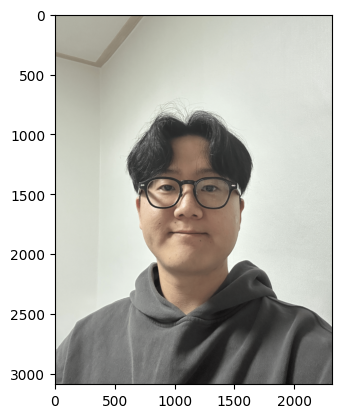

In [39]:
# BGR -> RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## Face Detection

In [40]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

# detector를 이용해서 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid), upsampling

In [41]:
# # bounding box를 출력
# print(dlib_rects)

# for dlib_rect in dlib_rects:
#     l = dlib_rect.left()
#     t = dlib_rect.top()
#     r = dlib_rect.right()
#     b = dlib_rect.bottom()

#     # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
#     cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()

**bounding box 너무 작아서 턱이 덜 들어옴** -> margin 추가해서 영역확장

rectangles[[(691, 1224) (1490, 2023)]]


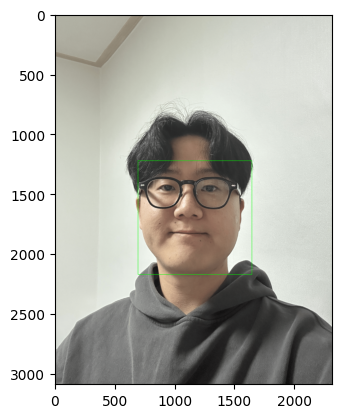

In [42]:
# margin 추가
margin = 150

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right() + margin
    b = dlib_rect.bottom() + margin

    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

-> **성공적으로 확장 성공**

## Landmark 모델을 통한 얼굴 랜드마크 확인

In [43]:
model_path = '/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/course/keras/models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path) # 얼굴 랜드마크를 찾는 클래스 생성

In [44]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾기
# face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0])) # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고 각 원소는 68개의 랜드마크 위치가 나열된 list
print(list_landmarks)

68
[[(733, 1494), (727, 1596), (723, 1707), (731, 1815), (763, 1918), (818, 2006), (896, 2074), (989, 2124), (1095, 2147), (1212, 2140), (1321, 2099), (1412, 2034), (1480, 1949), (1519, 1841), (1540, 1727), (1548, 1609), (1548, 1498), (825, 1357), (858, 1297), (925, 1283), (994, 1296), (1056, 1329), (1149, 1339), (1222, 1314), (1302, 1307), (1381, 1328), (1429, 1391), (1106, 1415), (1105, 1483), (1103, 1549), (1101, 1621), (1019, 1693), (1060, 1701), (1103, 1712), (1151, 1704), (1199, 1697), (895, 1443), (929, 1433), (968, 1433), (1009, 1446), (969, 1451), (929, 1453), (1221, 1450), (1262, 1438), (1302, 1440), (1341, 1454), (1301, 1461), (1261, 1459), (956, 1830), (1016, 1811), (1068, 1799), (1104, 1812), (1141, 1801), (1194, 1816), (1268, 1840), (1191, 1865), (1140, 1872), (1102, 1873), (1063, 1869), (1017, 1861), (974, 1827), (1068, 1828), (1104, 1833), (1141, 1830), (1248, 1835), (1140, 1833), (1103, 1834), (1066, 1829)]]


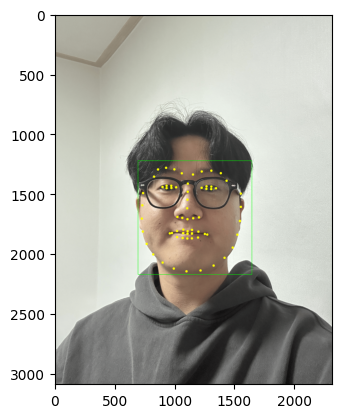

In [45]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255),-1) # 2-> 10으로 변경해서 점 더 진하게 확인
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 10이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 수염 이미지 load

In [46]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다, 코의 중심점 (1101, 1621)
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (1101, 1621-(800/2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로와 세로의 길이
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})') 

(1101, 1621)
(x,y) : (1101,1221)
(w,h) : (800,800)


In [47]:
sticker_path = '/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/ex_3_photo/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(800, 800, 3)


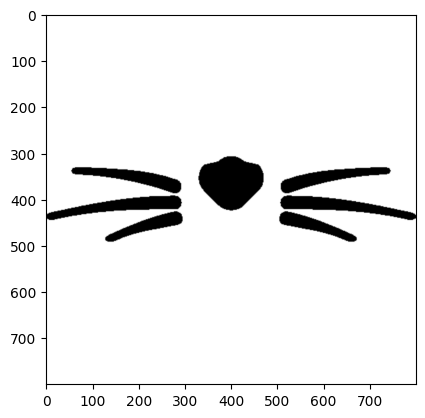

In [48]:
plt.imshow(img_sticker)
plt.show()

In [49]:
refined_x = x - w // 2 
refined_y = y   #코에 위치해야하니까 y값 고정


print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (701,1221)


In [50]:
sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0], refined_x : refined_x + img_sticker.shape[1]]

img_show[refined_y : refined_y + img_sticker.shape[0], refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker != 0,sticker_area, img_sticker).astype(np.uint8)

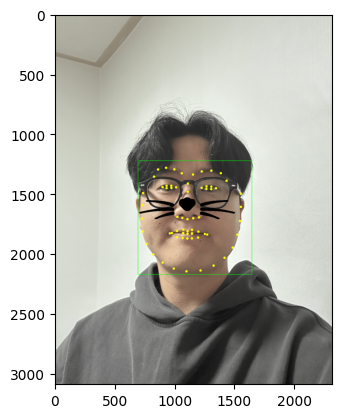

In [51]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 원본 이미지가 보이게 하기

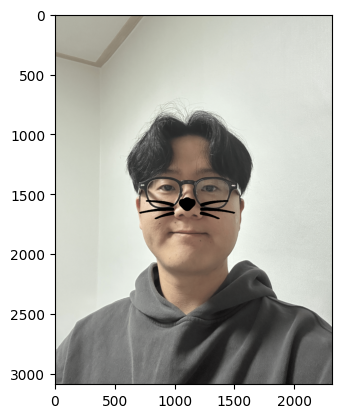

In [52]:
sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0], refined_x : refined_x + img_sticker.shape[1]] # 원본 이미지인 imb_bgr에서 스티커를 붙일 부분을 crop
img_bgr[refined_y : refined_y + img_sticker.shape[0], refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker != 0,sticker_area, img_sticker).astype(np.uint8)
    
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


## 다양한 각도에서 셀카를 찍어보고 적용하기- 왼쪽

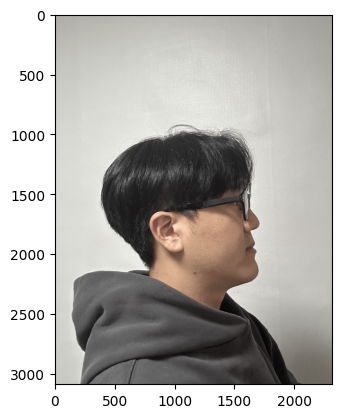

In [53]:
left_selfie_path = '/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/ex_3_photo/left.png'
img_bgr = cv2.imread(left_selfie_path)
img_show = img_bgr.copy()

# BGR -> RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [54]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

# detector를 이용해서 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid), upsampling

rectangles[]


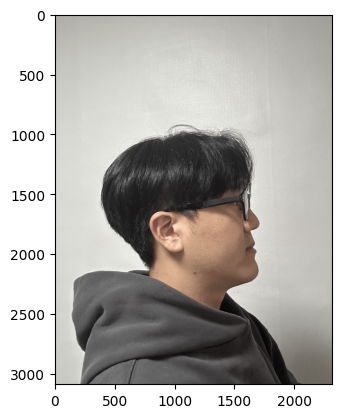

In [55]:
# bounding box를 출력
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

-> **완전 옆모습 일때는 bounding box 못그림**

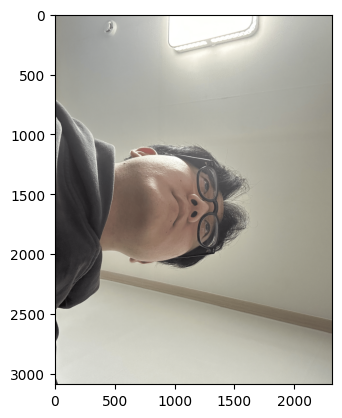

In [57]:
## 다양한 각도에서 셀카 찍어 적용하기 - 밑
bottom_selfie_path = '/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/ex_3_photo/bottom.png'
img_bgr = cv2.imread(bottom_selfie_path)
img_show = img_bgr.copy()

# BGR -> RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


rectangles[]


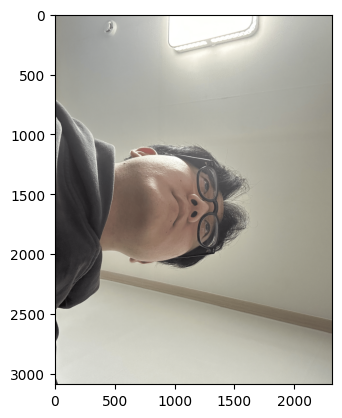

In [58]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid), upsampling

# bounding box를 출력
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

-> **왼쪽에서 찍은 사진과 마천가지로 극단적인 각도에서는 bounding box를 찾지 못함**

## 적당한 측면 사진을 찾아서 적용해보기

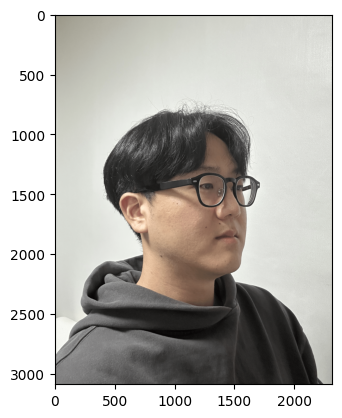

In [59]:
side_l_selfie_path = '/Users/mj/Library/CloudStorage/OneDrive-개인/AI_study/data/ex_3_photo/side.png'

img_bgr_l = cv2.imread(side_l_selfie_path)
img_show_l = img_bgr_l.copy()

# BGR -> RGB
img_rgb_l = cv2.cvtColor(img_bgr_l, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb_l)
plt.show()

rectangles[[(830, 1150) (1788, 2108)]]


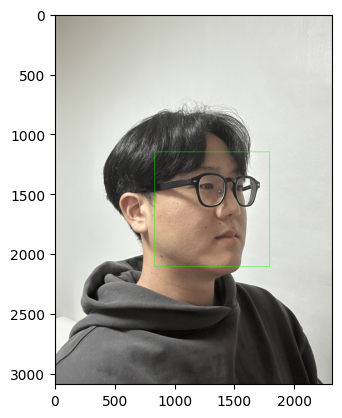

In [60]:
dlib_rects_l = detector_hog(img_rgb_l, 1)   

# bounding box를 출력
print(dlib_rects_l)

for dlib_rect in dlib_rects_l:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    cv2.rectangle(img_show_l, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb_l = cv2.cvtColor(img_show_l, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_l)
plt.show()

In [61]:
landmark_predictor = dlib.shape_predictor(model_path)

In [62]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾기
# face landmark 좌표를 저장
for dlib_rect in dlib_rects_l:
    points = landmark_predictor(img_rgb_l, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0])) # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고 각 원소는 68개의 랜드마크 위치가 나열된 list
print(list_landmarks)

68
[[(708, 1517), (720, 1638), (739, 1757), (781, 1875), (862, 1970), (978, 2040), (1121, 2091), (1253, 2139), (1372, 2153), (1464, 2125), (1523, 2052), (1565, 1963), (1592, 1879), (1612, 1785), (1625, 1689), (1622, 1595), (1599, 1511), (947, 1362), (1028, 1307), (1131, 1297), (1230, 1324), (1316, 1366), (1403, 1380), (1454, 1348), (1512, 1322), (1574, 1317), (1610, 1361), (1368, 1451), (1388, 1513), (1412, 1571), (1435, 1634), (1304, 1714), (1356, 1724), (1404, 1732), (1443, 1721), (1478, 1703), (1052, 1431), (1111, 1400), (1172, 1404), (1220, 1454), (1170, 1458), (1108, 1456), (1429, 1463), (1473, 1423), (1524, 1423), (1556, 1460), (1524, 1475), (1477, 1475), (1230, 1903), (1323, 1861), (1384, 1830), (1415, 1838), (1440, 1823), (1469, 1846), (1493, 1873), (1468, 1896), (1443, 1911), (1415, 1916), (1381, 1919), (1324, 1918), (1264, 1900), (1379, 1873), (1412, 1871), (1436, 1866), (1469, 1873), (1438, 1858), (1414, 1865), (1383, 1869)]]


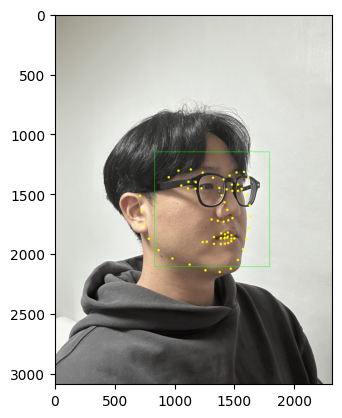

In [63]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show_l, point, 10, (0, 255, 255),-1) # 2-> 10으로 변경해서 점 더 진하게 확인
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 10이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림

img_show_rgb_l = cv2.cvtColor(img_show_l, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_l)
plt.show()

**얼굴 윤곽만 비슷하고 눈 코 입 부분은 landmark가 왼쪽으로 치우치는 현상 - 왜?**

원인 가설
- shape_predictor_68_face_landmarks.dat 모델은 대부분 정면 얼굴 이미지를 대상으로 학습 - 모델 문제인가?..
- 얼굴이 측면으로 돌아간 경우, 2D 랜드마크 모델은 얼굴의 3D 구조를 올바르게 인식하지 못한다? - 이것도 모델??..

해결방안
- 포즈보정 : 회전?보정을 통해서 정면으로 돌리기?
- 3D landmark 모델 사용?

### 얼굴 회전해서 보정해보기

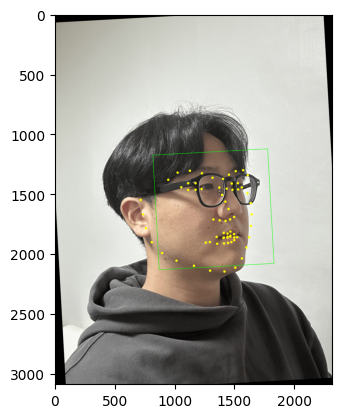

In [64]:
import math

# 랜드마크에서 눈 좌표 추출 함수
def get_eye_points(landmarks):
    left_eye = np.mean(landmarks[36:42], axis=0).astype("int")  # 왼쪽 눈 중심
    right_eye = np.mean(landmarks[42:48], axis=0).astype("int")  # 오른쪽 눈 중심
    return left_eye, right_eye

# 얼굴 이미지 회전 함수
def align_face(image, landmarks):
    # 눈 좌표 계산
    left_eye, right_eye = get_eye_points(landmarks)
    
    # 눈 사이의 기울기 계산
    dY = right_eye[1] - left_eye[1]
    dX = right_eye[0] - left_eye[0]
    angle = np.degrees(np.arctan2(dY, dX))  # 눈의 기울기 각도 계산
    
    # 회전 중심: 두 눈의 중심
    eyes_center = (int((left_eye[0] + right_eye[0]) // 2), int((left_eye[1] + right_eye[1]) // 2))
    
    # 회전 행렬 생성
    rot_matrix = cv2.getRotationMatrix2D(eyes_center, angle, 1.0)  # 스케일은 1.0(원본 크기 유지)
    
    # 이미지 회전
    rotated_image = cv2.warpAffine(image, rot_matrix, (image.shape[1], image.shape[0]))
    return rotated_image

# 얼굴 보정 적용
aligned_img = align_face(img_show_l, np.array(list_landmarks[0]))

# 결과 출력
aligned_img_rgb = cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB)
plt.imshow(aligned_img_rgb)
plt.show()

- 이런식으로 회전하여 수정 혹은 랜드마트 오프셋을 조정하거나 수동으로 좌표를 옮겨서 조정해야할거 같다.
- 가장 정확하고 쉬운 방법?은 모델을 변경해서 한 번 확인해 보는게 좋을거 같다. 